# Report: Traffic accidents in Berlin

This project analyzes traffic accidents in Berlin in 2021. It examines what types of accidents are most common and attempts to identify times and areas with particularly high accident occurrences. Additionally, sensor data is used to investigate the effect of traffic on the number and severety of accidents. This way it aims to suggest strategies to prevent traffic accidents.

## Install dependencies
Initially, install all required dependencies.

In [ ]:
%pip install pandas
%pip install plotly
%pip install nbformat
%pip install -U kaleido

In [221]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

In [292]:
sns.set_palette('Set2')

# Accident data

The dataset provides information on traffic accidents that occurred in Berlin during 2021. It includes various details for each road accident, such as the location (district and coordinates), timing (month, day, hour), and the vehicles involved. Further, the acccidents are classified by their severity and type. 

As part of the data pipeline, columns with no value for this analyisis have been dropped and the values of categorical columns have been renamed for easier understanding. Additionally, a new column has been created to indicate all the vehicles involved in each accident, derived from the original one-hot encoded columns.

## Load data

In [249]:
accidents = pd.read_sql_table('accidents', 'sqlite:///../accidents.sqlite')
accidents.head()

,OBJECTID,BEZ,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84,BETEILIGT
0,219249,Pankow,2021,11,18,Monday,with lightly injured,0,crossing,darkness,0,1,0,1,0,0,wet,13.426895,52.533940,PKW-Krad
1,219248,Tempelhof-Schöneberg,2021,12,19,Saturday,with lightly injured,6,turning,darkness,0,1,1,0,0,0,wet,13.392090,52.439951,PKW-Fuss
2,219247,Charlottenburg-Wilmersdorf,2021,12,17,Wednesday,with lightly injured,5,turning,darkness,0,1,0,0,0,0,dry,13.326242,52.538028,PKW
3,219246,Charlottenburg-Wilmersdorf,2021,12,15,Saturday,with lightly injured,5,turning,dawn,0,1,0,1,0,0,wet,13.316521,52.499534,PKW-Krad
4,219243,Lichtenberg,2021,12,9,Thursday,with lightly injured,3,in longitudinal traffic,daylight,0,1,0,0,0,1,iced,13.525752,52.493867,PKW-Sonstige


## What type of accidents happend?

Type of accidents

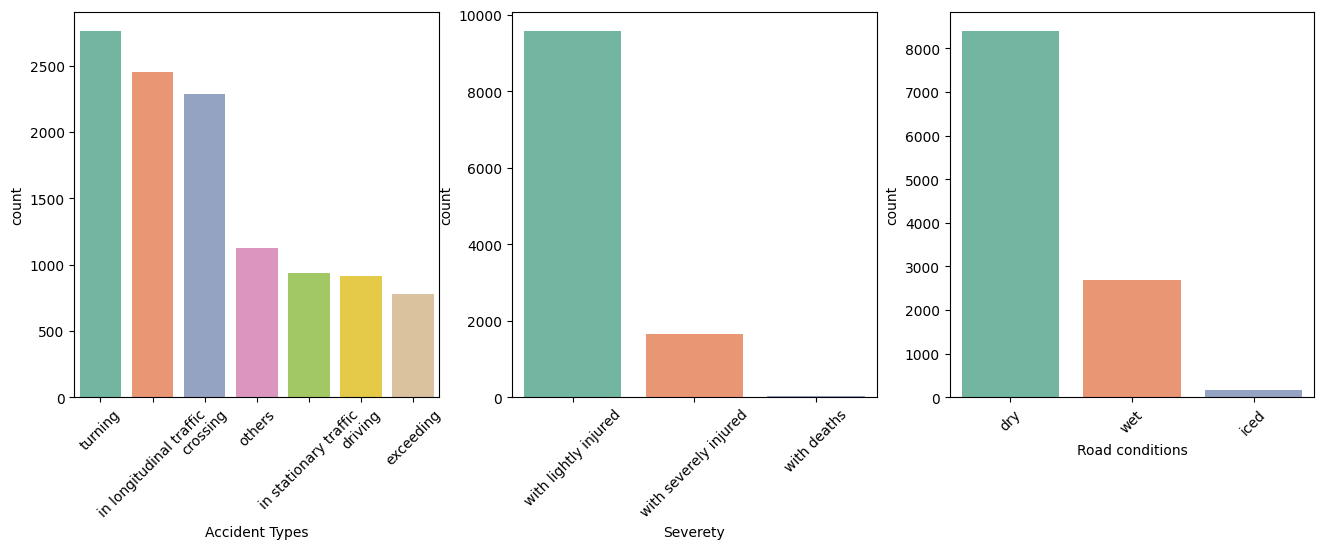

In [293]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

sns.countplot(x='UTYP1', data=accidents, order=accidents['UTYP1'].value_counts().index, ax=axes[0])
sns.countplot(x='UKATEGORIE', data=accidents, order=accidents['UKATEGORIE'].value_counts().index, ax=axes[1])
sns.countplot(x='USTRZUSTAND', data=accidents, order=accidents['USTRZUSTAND'].value_counts().index, ax=axes[2])
for ax in fig.axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
axes[0].set_xlabel('Accident Types')
axes[1].set_xlabel("Severety")
axes[2].set_xlabel("Road conditions")
plt.show()

Add numbers

Comment
1)
2)
3)

Between which types of road users do most accidents occur?

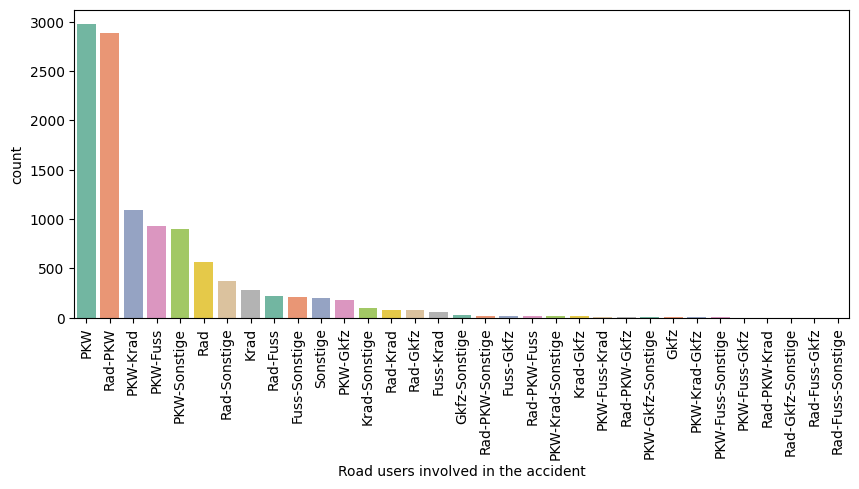

In [297]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='BETEILIGT', data=accidents, order=accidents['BETEILIGT'].value_counts().index, palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Road users involved in the accident')
plt.show()

Almost as many accidents with bikes and cars as with only cars

Look at a subset of the dataframe to see who is most involved in deadly accidents

In [ ]:
deaths = accidents[accidents['UKATEGORIE'] == 'with deaths']

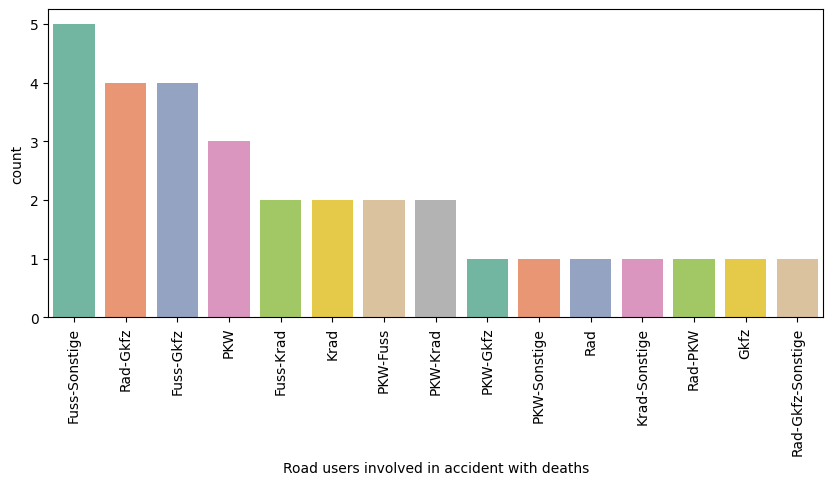

In [267]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x='BETEILIGT', data=deaths, order=deaths['BETEILIGT'].value_counts().index, palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Road users involved in accident with deaths')
plt.show()

Most deadly accidents happend between pedestrians and bikers and big vehicals like trucks (Gfkz) or others, which includes busses and trams.
...

## When did the accidents happen?

Number of accidents every months

In [269]:
accidents.groupby(["UMONAT"]).OBJECTID.count()

UMONAT
1      481
2      436
3      765
4      720
5      991
6     1314
7     1053
8     1274
9     1300
10    1130
11    1007
12     796
Name: OBJECTID, dtype: int64

Comment

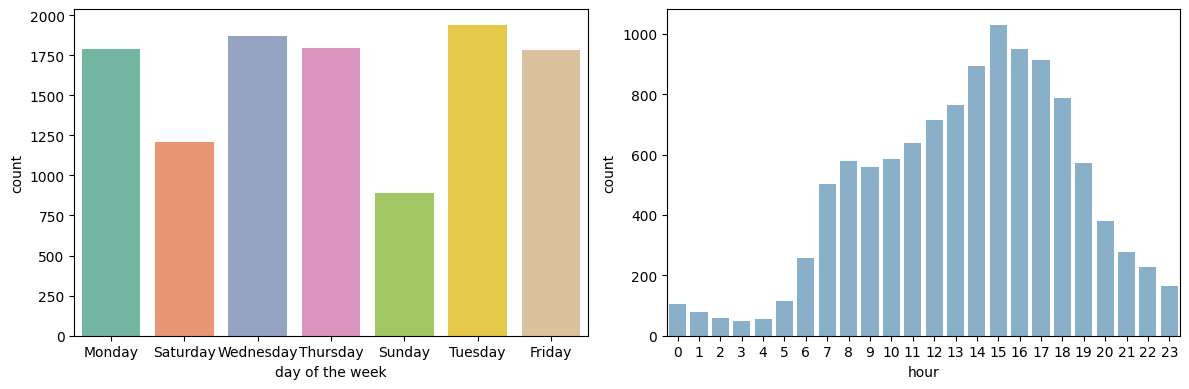

In [300]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.countplot(x='UWOCHENTAG', data=accidents ,ax=axes[0])
sns.countplot(x='USTUNDE', data=accidents, ax=axes[1], color='#80B1D3')

axes[0].set_xlabel("day of the week")
axes[1].set_xlabel('hour')

plt.tight_layout()
plt.show()

## Where did the accidents happen?
First of all we have a look at the different districts and the amount of accidents there

In [259]:
pd.pivot_table(accidents, index= ['BEZ'], columns = ['UWOCHENTAG'], values=['OBJECTID'], aggfunc = 'count',  margins=True)

OBJECTID                                          \
UWOCHENTAG                   Friday Monday Saturday Sunday Thursday Tuesday   
BEZ                                                                           
Charlottenburg-Wilmersdorf      209    244      147    108      211     265   
Friedrichshain-Kreuzberg        173    166      132     81      204     174   
Lichtenberg                      87    104       74     50      108     102   
Marzahn-Hellersdorf              81     93       51     32      114      90   
Mitte                           277    238      209    142      275     312   
Neukölln                        142    116       92     66      115     139   
Pankow                          185    156       86     87      162     172   
Reinickendorf                   125    109       78     57      114     119   
Spandau                         114    131       77     56      110     113   
Steglitz-Zehlendorf             105    129       82     57      112     145   
Tempelhof-Schöneberg            167    166      110     88      160     179   
Treptow-Köpenick                116    134       69     68      107     131   
All                            1781   1786     1207    892     1792    1941   

                                             
UWOCHENTAG                 Wednesday    All  
BEZ                                          
Charlottenburg-Wilmersdorf       214   1398  
Friedrichshain-Kreuzberg         177   1107  
Lichtenberg                       94    619  
Marzahn-Hellersdorf               77    538  
Mitte                            308   1761  
Neukölln                         129    799  
Pankow                           163   1011  
Reinickendorf                    127    729  
Spandau                          112    713  
Steglitz-Zehlendorf              127    757  
Tempelhof-Schöneberg             189   1059  
Treptow-Köpenick                 151    776  
All                             1868  11267

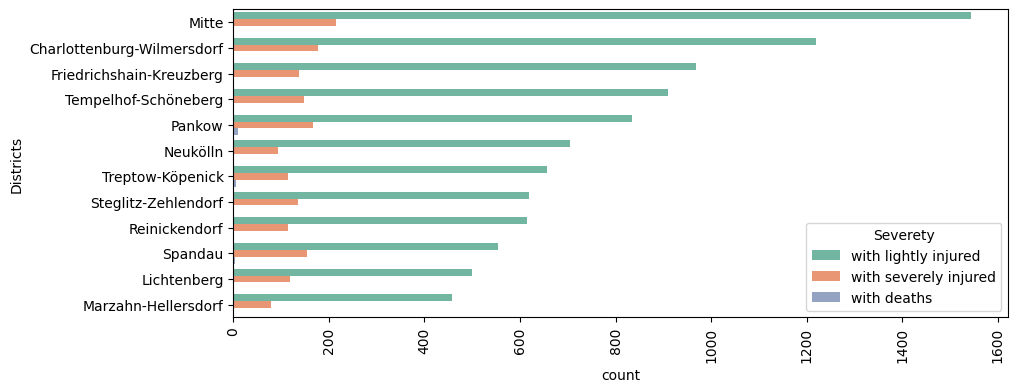

In [301]:
f, ax = plt.subplots(figsize=(10, 4))
sns.countplot(y='BEZ', data=accidents, hue = 'UKATEGORIE', order=accidents['BEZ'].value_counts().index)
plt.xticks(rotation='vertical')
plt.ylabel('Districts')
legend = plt.gca().get_legend()
legend.set_title('Severety')
plt.show()

Comment

### Visualize cooridnates on map

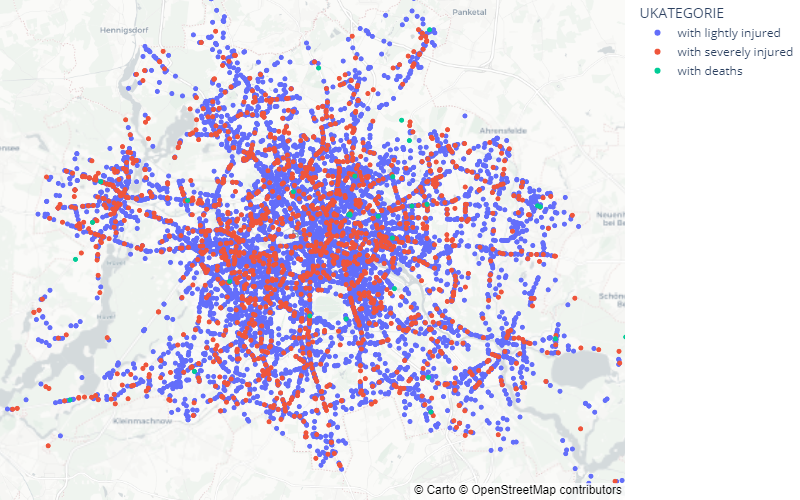

In [ ]:
fig = px.scatter_mapbox(accidents, 
                        lat="YGCSWGS84", 
                        lon="XGCSWGS84", 
                        hover_name="OBJECTID", 
                        hover_data=["BEZ", "USTRZUSTAND", "UMONAT"],
                        color="UKATEGORIE",
                        zoom=9.5, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.show("png") #display as image as well as interactive map is not displayed in github

## Key takeaways

1. 2. 3. 

# Traffic sensor data

This dataset comprises traffic data for Berlin that was collected using detectors. The data includes information on the average number of cars and trucks passing through each hour, as well as the average speed recorded by the detectors. In the data pipeline, additional metadata, such as their location, was incorporated for each sensor.

As the hourly traffic sensor data for the whole year resulted in a huge dataset, it had to be reduced.
This has been done in two ways:
- Limit time frame to one month: Since the data exploration has shown that most accidents happend in June we will take a closer look at the traffic in June 2021.
- Aggregate the data: To analyse the traffic of the whole year 2021 the hourly data has been aggregated to daily averages for every sensor.

## Hourly traffic data for June 2021

In [235]:
traffic_june = pd.read_sql_table('traffic_month', 'sqlite:///../traffic.sqlite')
traffic_june.head()

,detid_15,tag,stunde,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010001076,2021-06-01,0,0.83,24,42,17,42,7,42,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
1,100101010001076,2021-06-01,2,0.75,21,41,20,40,1,61,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
2,100101010001076,2021-06-01,3,0.92,15,51,10,46,5,62,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
3,100101010001076,2021-06-01,4,0.92,56,56,46,56,10,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19
4,100101010001076,2021-06-01,5,1.00,149,54,133,54,16,55,...,100201010000481,Berliner Straße,"zwischen Seehofstraße und Gartenstraße, in Höh...",Clayallee,West,HF_R,Hauptfahrbahn rechte Spur,13.263106,52.435112,2003-02-19


During which hours was the most traffic?

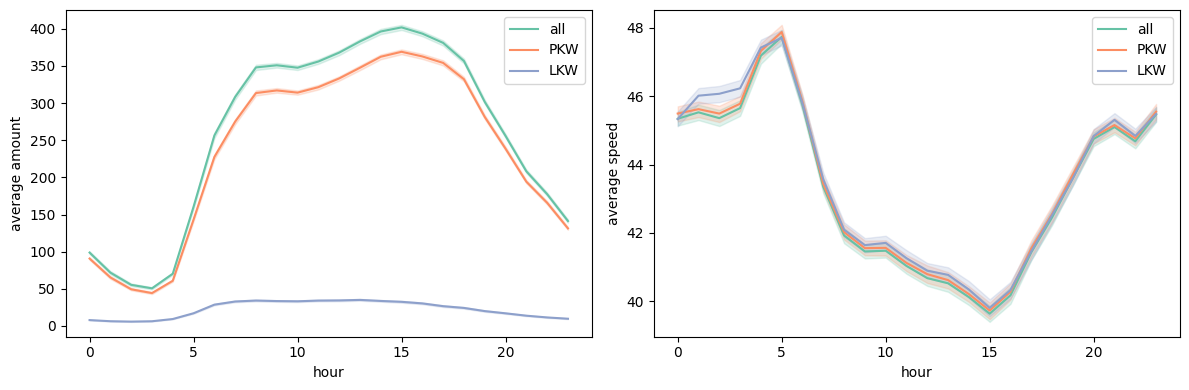

In [276]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))

sns.lineplot(x='stunde', y= 'q_kfz_det_hr', label='all', data=traffic_june, ax=axes[0])
sns.lineplot(x='stunde', y= 'q_pkw_det_hr', label='PKW',data=traffic_june, ax=axes[0])
sns.lineplot(x='stunde', y= 'q_lkw_det_hr', label='LKW',data=traffic_june, ax=axes[0])

sns.lineplot(x='stunde', y= 'v_kfz_det_hr', data=traffic_june, label='all', ax=axes[1])
sns.lineplot(x='stunde', y= 'v_pkw_det_hr', data=traffic_june, label='PKW', ax=axes[1])
sns.lineplot(x='stunde', y= 'v_lkw_det_hr', data=traffic_june, label='LKW', ax=axes[1])

axes[0].set_xlabel('hour')
axes[1].set_xlabel("hour")
axes[0].set_ylabel('average amount')
axes[1].set_ylabel("average speed")

plt.tight_layout()
plt.show()

## Daily traffic Data for 2021

In [237]:
traffic_2021 = pd.read_sql_table('traffic_2021', 'sqlite:///../traffic.sqlite')
traffic_2021.head()

,detid_15,tag,qualitaet,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,MQ_KURZNAME,...,MQ_ID15,STRASSE,POSITION,POS_DETAIL,RICHTUNG,SPUR,annotation,LÄNGE (WGS84),BREITE (WGS84),INBETRIEBNAHME
0,100101010000167,01.01.2021,1.0,262.958333,76.279167,259.833333,76.483333,3.125000,56.312500,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
1,100101010000167,02.01.2021,1.0,425.458333,76.316667,415.958333,76.995833,9.500000,67.666667,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
2,100101010000167,03.01.2021,1.0,345.708333,71.070833,337.791667,72.037500,7.916667,61.408333,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
3,100101010000167,04.01.2021,1.0,546.000000,78.025000,481.291667,79.308333,64.708333,72.920833,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18
4,100101010000167,05.01.2021,1.0,568.958333,76.570833,508.333333,78.466667,60.625000,68.250000,TE001,...,100201010000077,A115,AS Spanische Allee – Brücke,AK Zehlendorf,Südwest,HF_R,Hauptfahrbahn rechte Spur,13.192578,52.433868,2003-02-18


Traffic over the year:

In [238]:
daily_avg = traffic_2021.groupby("tag")[["q_kfz_det_hr","v_kfz_det_hr"]].mean()

<Axes: xlabel='tag', ylabel='q_kfz_det_hr'>

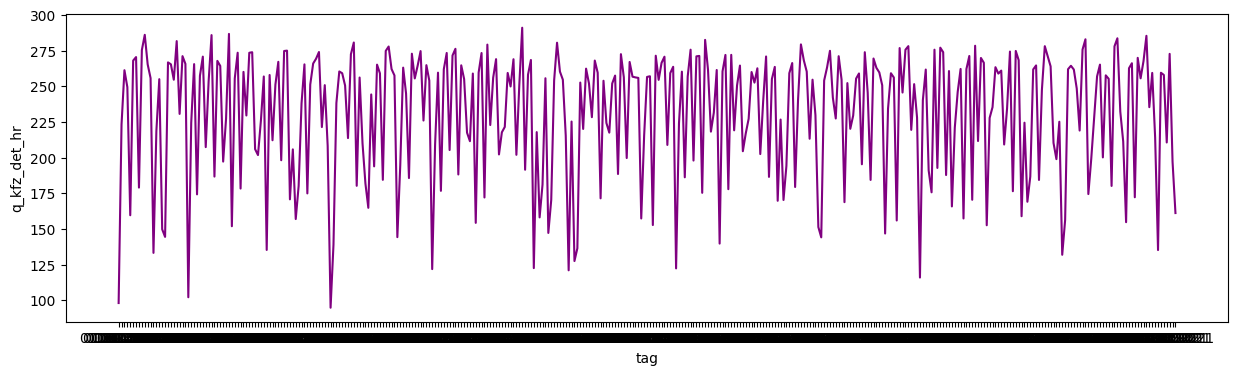

In [305]:
f, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=daily_avg, x="tag", y="q_kfz_det_hr", color = 'purple')

<Axes: xlabel='tag', ylabel='v_kfz_det_hr'>

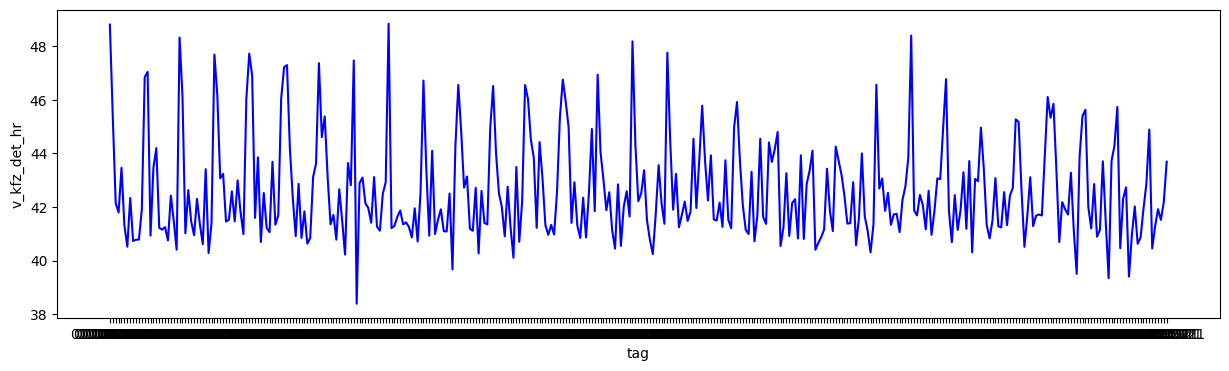

In [303]:
f, ax = plt.subplots(figsize=(15, 4))
sns.lineplot(data=daily_avg, x="tag", y="v_kfz_det_hr", color = 'blue')

## Find locations with high traffic

Overall average for every location

In [241]:
traffic_sensors = traffic_2021.groupby('detid_15')[["q_kfz_det_hr","v_kfz_det_hr","q_pkw_det_hr","v_pkw_det_hr","q_lkw_det_hr","v_lkw_det_hr","LÄNGE (WGS84)","BREITE (WGS84)"]].mean()
traffic_sensors.describe()

,q_kfz_det_hr,v_kfz_det_hr,q_pkw_det_hr,v_pkw_det_hr,q_lkw_det_hr,v_lkw_det_hr,LÄNGE (WGS84),BREITE (WGS84)
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,239.596443,42.457792,222.332425,42.559690,17.285348,35.912091,13.388133,52.502504
std,117.844477,10.436542,112.206848,10.543432,23.981083,10.830563,0.075730,0.039157
min,0.184524,2.599775,0.092262,1.685205,0.092262,0.901515,13.156639,52.398253
25%,165.729902,36.629931,152.962518,36.934849,6.213529,30.357383,13.346215,52.481545
50%,243.944595,42.831785,224.619612,42.921621,11.354520,36.520420,13.384701,52.508231
75%,306.982659,48.691962,286.835738,48.889107,17.704100,42.419803,13.432945,52.528842
max,1152.207986,93.299904,1085.388021,96.597820,243.822927,92.058322,13.595328,52.586297


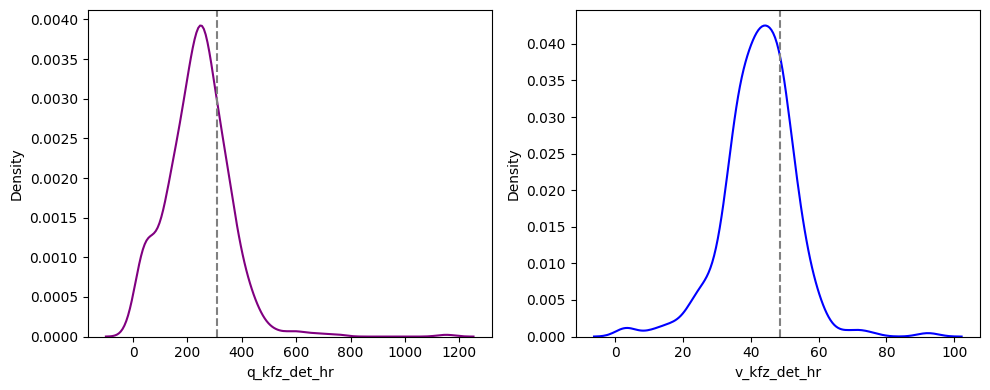

In [307]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

sns.kdeplot(data=traffic_sensors, x="q_kfz_det_hr", color = 'purple', ax=axes[0])
quantile_75_q = traffic_sensors['q_kfz_det_hr'].quantile(0.75)
axes[0].axvline(quantile_75_q, color='grey', linestyle='--', label='75th Percentile')

sns.kdeplot(data=traffic_sensors, x="v_kfz_det_hr", color = 'blue', ax=axes[1])
quantile_75_v = traffic_sensors['v_kfz_det_hr'].quantile(0.75)
axes[1].axvline(quantile_75_v, color='grey', linestyle='--', label='75th Percentile')

plt.tight_layout()
plt.show()

Locations with more or faster traffic (above 75% quantil)

In [243]:
pd.options.mode.chained_assignment = None

high_traffic = traffic_sensors[(traffic_sensors["q_kfz_det_hr"] > 306.982659)]
high_traffic['label'] = 'high quantity'

fast_traffic = traffic_sensors[(traffic_sensors["v_kfz_det_hr"] > 48.691962)]
fast_traffic['label'] = 'high velocity'

traffic_int = pd.concat([high_traffic, fast_traffic])

# Combine both data sources

In [244]:
accidents_june = accidents[accidents['UMONAT']==6]
accidents_june.head()

,OBJECTID,BEZ,UJAHR,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,USTRZUSTAND,XGCSWGS84,YGCSWGS84,BETEILIGT
5212,213679,Mitte,2021,6,14,Wednesday,with lightly injured,0,in stationary traffic,daylight,0,1,0,0,0,1,dry,13.407367,52.526186,PKW-Sonstige
5214,213677,Charlottenburg-Wilmersdorf,2021,6,14,Monday,with lightly injured,2,others,daylight,0,1,0,1,0,0,dry,13.314601,52.510828,PKW-Krad
5218,213673,Friedrichshain-Kreuzberg,2021,6,9,Thursday,with lightly injured,0,driving,daylight,0,0,0,1,0,0,dry,13.395171,52.495940,Krad
5219,213672,Charlottenburg-Wilmersdorf,2021,6,12,Thursday,with lightly injured,3,in longitudinal traffic,daylight,1,0,0,0,0,1,dry,13.279360,52.523840,Rad-Sonstige
5220,213671,Marzahn-Hellersdorf,2021,6,12,Monday,with lightly injured,5,crossing,daylight,1,1,0,0,0,0,dry,13.614250,52.530256,Rad-PKW


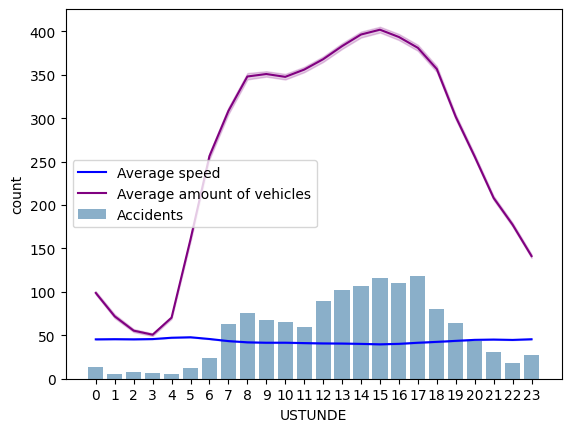

In [308]:
sns.countplot(x='USTUNDE', data=accidents_june, label='Accidents', color='#80B1D3')
sns.lineplot(x='stunde', y ='v_kfz_det_hr', data=traffic_june, color='blue', label='Average speed')
sns.lineplot(x='stunde', y ='q_kfz_det_hr', data=traffic_june, color='purple', label='Average amount of vehicles')

plt.legend()
plt.show()

In [246]:
accidents2 = accidents[(accidents['UKATEGORIE'] == 'with deaths') | (accidents['UKATEGORIE'] == 'with severely injured')]
accidents2.rename(columns={'YGCSWGS84': 'lat', 'XGCSWGS84': 'long', 'UKATEGORIE': 'label'}, inplace=True)

traffic_int.rename(columns={'BREITE (WGS84)': 'lat', 'LÄNGE (WGS84)': 'long'}, inplace=True)

june = pd.concat([accidents2, traffic_int], axis=0)


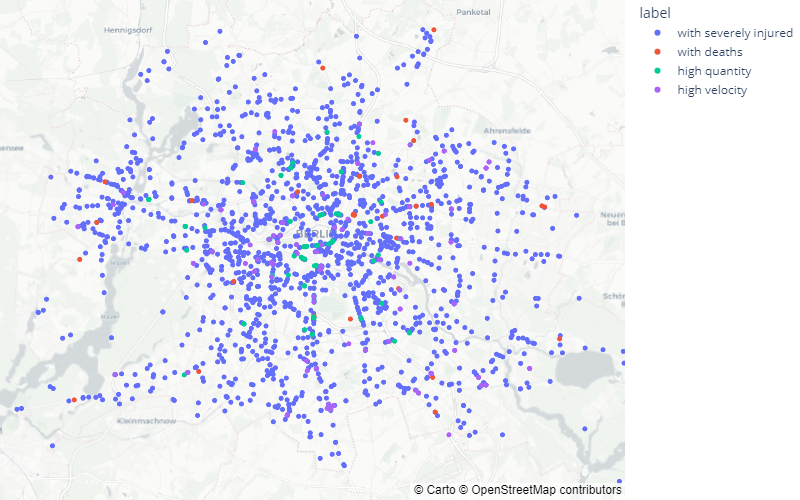

In [247]:
fig = px.scatter_mapbox(june, 
                        lat='lat', 
                        lon='long',  
                        color="label",
                        zoom=9.5, 
                        height=500,
                        width=800)

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.show("png") #display as image as well as interactive map is not displayed in github